we are going to use MNIST Fashion Dataset.

Fashion-MNIST is a dataset of Zalando’s article images consisting of a training set of 60,000 examples and a test set of 10,000 examples.

Each example is a 28x28 grayscale image, associated with a label from 10 classes.

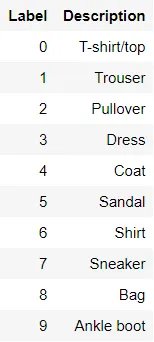

https://github.com/zalandoresearch/fashion-mnist

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [4]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


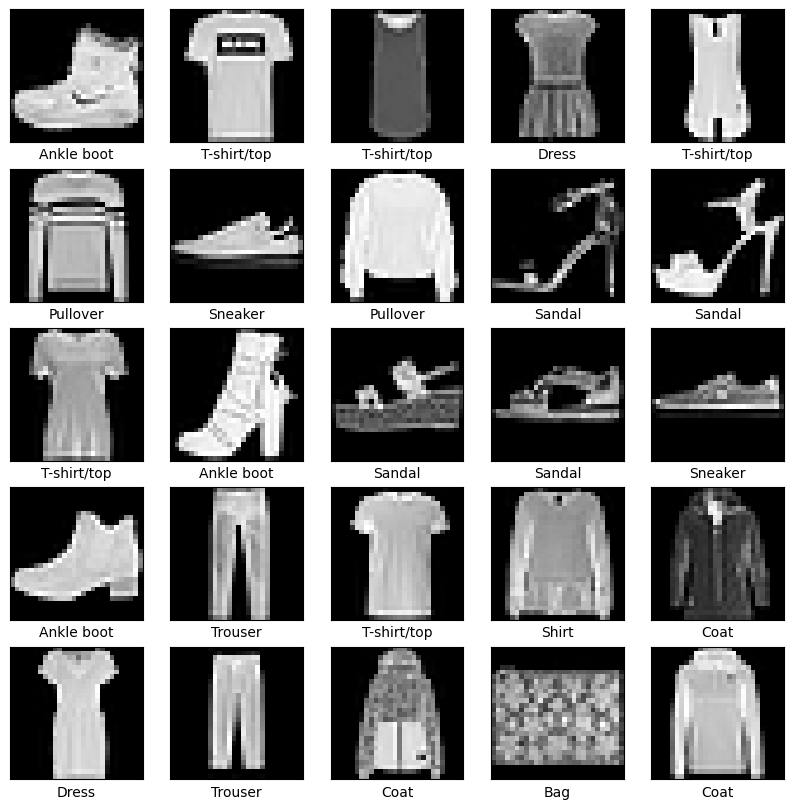

In [ ]:
import matplotlib.pyplot as plt

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(class_names[y_train[i]])  # directly use label
plt.show()



In [ ]:
y_train[0]

np.uint8(9)

In [ ]:
y_train[1]

np.uint8(0)

In [ ]:
y_train[2]

np.uint8(0)

In [ ]:
#(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values to range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
#If you don’t want to one-hot encode, you can keep integer labels (e.g. 0–9) and use loss='sparse_categorical_crossentropy'


In [ ]:
y_train[2]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
#Dense layers require 1D input

In [ ]:
# Build the ANN model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Input layer to flatten 28x28 image
    Dense(128, activation='relu'),  # Hidden layer 1
    Dense(64, activation='relu'),   # Hidden layer 2
    Dense(32, activation='relu'),   # Hidden layer 3
    Dense(10, activation='softmax') # Output layer with 10 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Params=(input units×output units)+output units (biases)

| Goal               | Code                                 |
| ------------------ | ------------------------------------ |
| Use bias (default) | `Dense(64)`                          |
| Remove bias        | `Dense(64, use_bias=False)`          |
| Set custom bias    | `Dense(64, bias_initializer='ones')` |


In [ ]:
28*28

784

In [ ]:
(784*128)+128

100480

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
64*938

60032

In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7426 - loss: 0.7319 - val_accuracy: 0.8395 - val_loss: 0.4357
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8627 - loss: 0.3819 - val_accuracy: 0.8615 - val_loss: 0.3795
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8757 - loss: 0.3382 - val_accuracy: 0.8663 - val_loss: 0.3677
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8819 - loss: 0.3177 - val_accuracy: 0.8759 - val_loss: 0.3477
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8910 - loss: 0.2943 - val_accuracy: 0.8740 - val_loss: 0.3489
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8960 - loss: 0.2836 - val_accuracy: 0.8678 - val_loss: 0.3665
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9012 - loss: 0.2640 - val_accuracy: 0.8796 - val_loss: 0.3309
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9035 - loss: 0.2605 - val_accuracy: 0.

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8834 - loss: 0.3272
Test Accuracy: 88.42%


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training samples with predictions:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


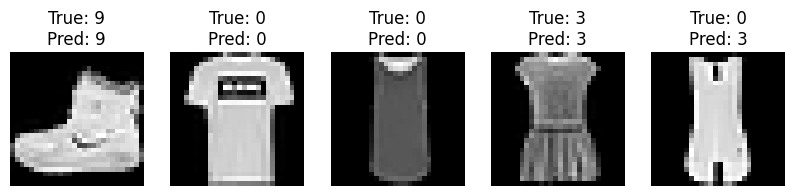

Testing samples with predictions:


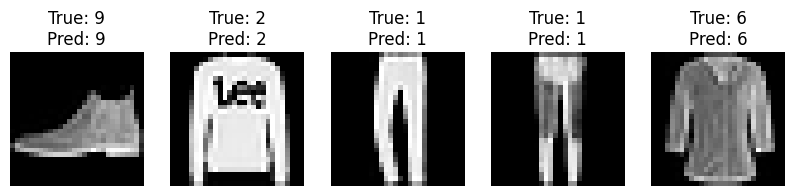

In [ ]:
# Make predictions on test set
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Function to display a few test samples and predictions
def display_samples(x, y_true, y_pred, num_samples=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(x[i], cmap='gray')
        plt.title(f"True: {y_true[i]}\nPred: {y_pred[i]}")
        plt.axis('off')
    plt.show()

# Display training, test, and predicted samples
print("Training samples with predictions:")
display_samples(x_train[:5], np.argmax(y_train[:5], axis=1), np.argmax(model.predict(x_train[:5]), axis=1))

print("Testing samples with predictions:")
display_samples(x_test[:5], true_classes[:5], predicted_classes[:5])


In [ ]:
predictions[0]

array([1.16007243e-06, 1.13891216e-08, 1.11133794e-07, 7.13376403e-06,
       2.79348082e-08, 5.62429614e-03, 8.43715497e-07, 3.64827178e-03,
       1.50904100e-06, 9.90716696e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

np.int64(9)